In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("emmarex/plantdisease")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/plantdisease


In [3]:
import os
print("Path to dataset files:", path)
print("Subfolders (classes):", os.listdir(path))


Path to dataset files: /kaggle/input/plantdisease
Subfolders (classes): ['PlantVillage', 'plantvillage']


In [4]:
import os

path = "/kaggle/input/plantdisease"
print("Contents of root:", os.listdir(path))

# Check contents of each subfolder
print("\nContents of PlantVillage:", os.listdir(path + "/PlantVillage"))
print("\nContents of plantvillage:", os.listdir(path + "/plantvillage"))


Contents of root: ['PlantVillage', 'plantvillage']

Contents of PlantVillage: ['Pepper__bell___Bacterial_spot', 'Potato___healthy', 'Tomato_Leaf_Mold', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Bacterial_spot', 'Tomato_Septoria_leaf_spot', 'Tomato_healthy', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Early_blight', 'Tomato__Target_Spot', 'Pepper__bell___healthy', 'Potato___Late_blight', 'Tomato_Late_blight', 'Potato___Early_blight', 'Tomato__Tomato_mosaic_virus']

Contents of plantvillage: ['PlantVillage']


In [5]:
import os

path = "/kaggle/input/plantdisease/PlantVillage"
print("Path to dataset files:", path)
print("Subfolders (classes):", os.listdir(path))


Path to dataset files: /kaggle/input/plantdisease/PlantVillage
Subfolders (classes): ['Pepper__bell___Bacterial_spot', 'Potato___healthy', 'Tomato_Leaf_Mold', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Bacterial_spot', 'Tomato_Septoria_leaf_spot', 'Tomato_healthy', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Early_blight', 'Tomato__Target_Spot', 'Pepper__bell___healthy', 'Potato___Late_blight', 'Tomato_Late_blight', 'Potato___Early_blight', 'Tomato__Tomato_mosaic_virus']


In [6]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

path = "/kaggle/input/plantdisease/PlantVillage"
print("Dataset classes:", os.listdir(path))

# Data generators with augmentation and split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    # Optional: Add augmentation like rotation, zoom, etc.
    # rotation_range=20,
    # zoom_range=0.2,
    # horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Dataset classes: ['Pepper__bell___Bacterial_spot', 'Potato___healthy', 'Tomato_Leaf_Mold', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Bacterial_spot', 'Tomato_Septoria_leaf_spot', 'Tomato_healthy', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Early_blight', 'Tomato__Target_Spot', 'Pepper__bell___healthy', 'Potato___Late_blight', 'Tomato_Late_blight', 'Potato___Early_blight', 'Tomato__Tomato_mosaic_virus']
Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 118s 212ms/step - accuracy: 0.4112 - loss: 1.9205 - val_accuracy: 0.7911 - val_loss: 0.6204
Epoch 2/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 49s 95ms/step - accuracy: 0.7740 - loss: 0.6756 - val_accuracy: 0.8559 - val_loss: 0.4346
Epoch 3/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 45s 87ms/step - accuracy: 0.8628 - loss: 0.4205 - val_accuracy: 0.8843 - val_loss: 0.3314
Epoch 4/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 48s 93ms/step - accuracy: 0.9038 - loss: 0.2835 - val_accuracy: 0.8945 - val_loss: 0.3020
Epoch 5/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 46s 88ms/step - accuracy: 0.9289 - loss: 0.2123 - val_accuracy: 0.8901 - val_loss: 0.3204
Epoch 6/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 45s 88ms/step - accuracy: 0.9417 - loss: 0.1705 - val_accuracy: 0.8656 - val_loss: 0.4469
Epoch 7/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.9523 - loss: 0.1436 - val_accuracy: 0.8906 - val_loss: 0.3669
Epoch 8/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 48s 92ms/step - accuracy: 0.9601 - loss: 0.1201 

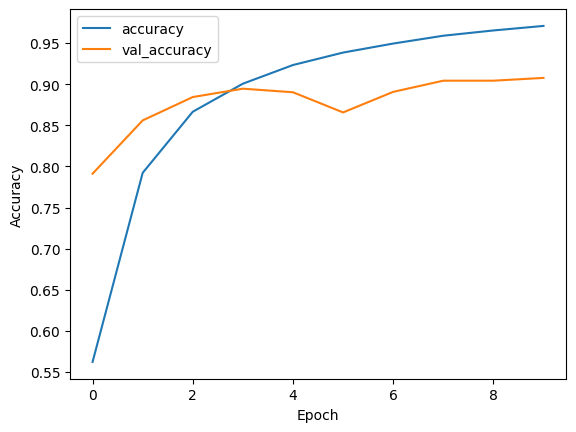

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


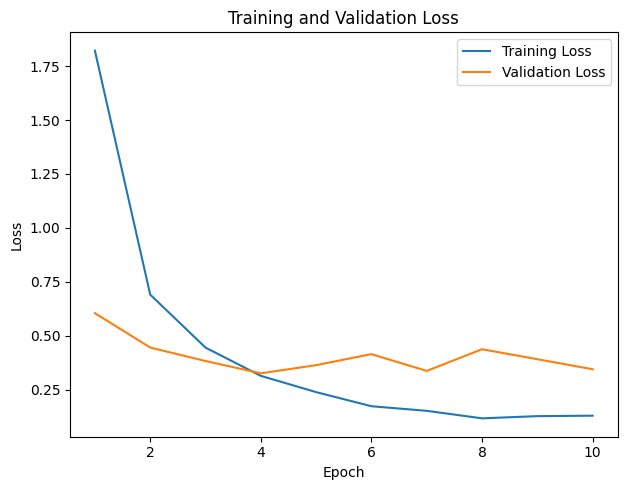

In [8]:
import matplotlib.pyplot as plt

epochs = range(1, 11)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs, [1.8213, 0.6902, 0.4446, 0.3136, 0.2381, 0.1727, 0.1513, 0.1165, 0.1267, 0.1288], label='Training Loss')
plt.plot(epochs, [0.6041, 0.4448, 0.3823, 0.3254, 0.3631, 0.4143, 0.3364, 0.4369, 0.3908, 0.3442], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
save_path = '/content/drive/MyDrive/plant_model.keras'  # or .pth, .pkl depending on your model


In [12]:
model.save("plant_model.keras")  # Save the entire model


In [19]:
import os
print("Keras model exists:", os.path.exists('/content/plant_model.keras'))


Keras model exists: True


In [17]:
!cp /content/plant_model.keras

cp: missing destination file operand after '/content/plant_model.keras'
Try 'cp --help' for more information.


In [18]:
print("Saved to Drive:", os.path.exists('/content/drive/MyDrive/plant-disease-project/model/plant_model.keras'))


Saved to Drive: False
